# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from imblearn.over_sampling import SMOTE


from warnings import filterwarnings
filterwarnings('ignore')

Using TensorFlow backend.


# Data Exploration & Feature Engineering

In [2]:
data = pd.read_csv('creditcard.csv')
print(f'Credit Card Fraud Detection Data Size - {data.shape}')

Credit Card Fraud Detection Data Size - (284807, 31)


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
amount_descp =  data['Amount'].describe()
time_descp =  data['Time'].describe()

print('Amount Statistics:\n\n',amount_descp)
print('\nTime Statistics:\n\n',time_descp)

Amount Statistics:

 count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Time Statistics:

 count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


In [8]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Exploratory Data Analysis

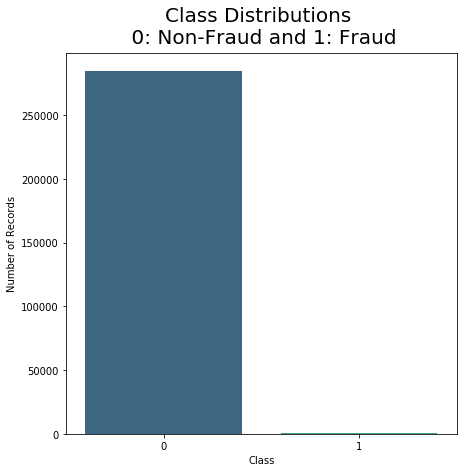

In [9]:
plt.figure(figsize=(7,7))
sns.countplot(data.Class, palette = 'viridis')
plt.title('Class Distributions \n 0: Non-Fraud and 1: Fraud', y= 1.01, fontsize = 20)
plt.ylabel('Number of Records')
plt.show()

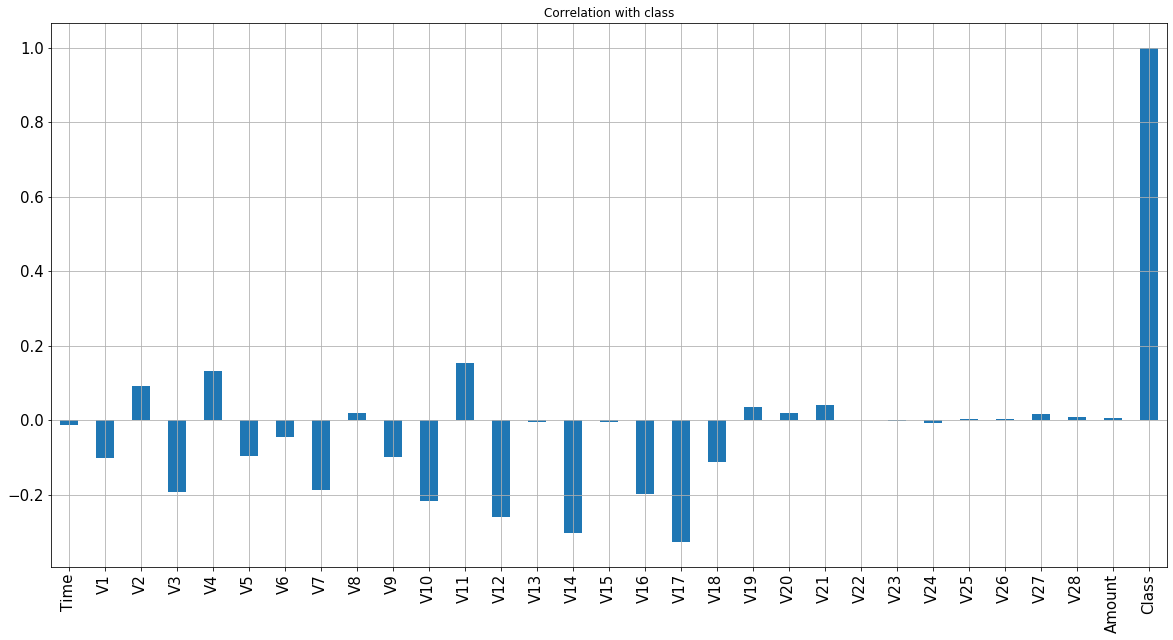

In [10]:
data.corrwith(data.Class).plot(kind = 'bar',figsize = (20, 10),fontsize = 15,rot = 90,
                               title = "Correlation with class", grid = True)
plt.show()

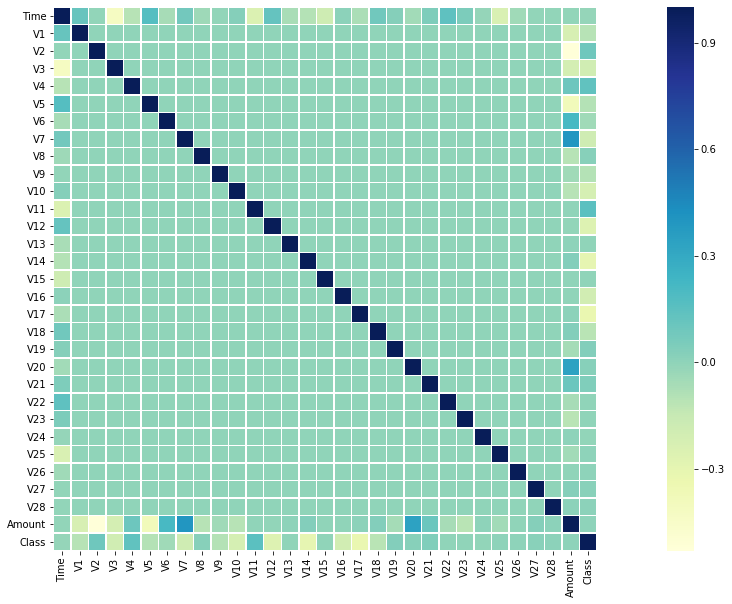

In [11]:
plt.subplots(figsize = (25,10))
sns.heatmap(data.corr(), square = True, cmap="YlGnBu", lw = 0.5)

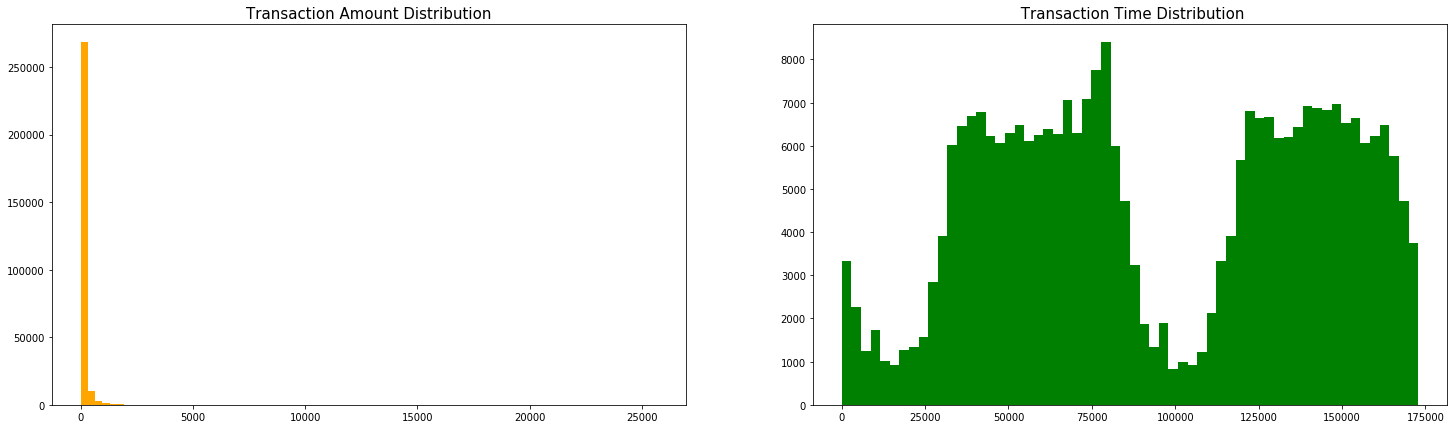

In [12]:
fig, ax = plt.subplots(1,2, figsize = (25,7))

ax[0].hist(data['Amount'], bins = 80, color = 'orange')
ax[0].set_title('Transaction Amount Distribution', fontsize = 15)

ax[1].hist(data['Time'], bins = 60, color = 'green')
ax[1].set_title(' Transaction Time Distribution',fontsize = 15)
plt.show()

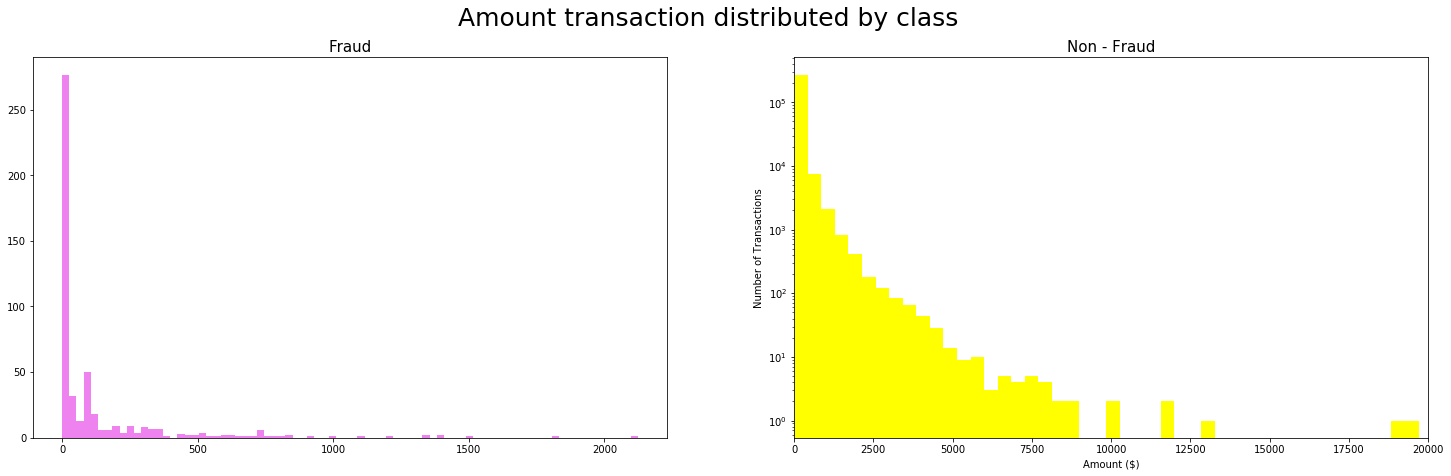

In [13]:
non_fraud_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]


predictors = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13',
              'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
              'V25', 'V26', 'V27', 'V28','Amount']

fig, ax = plt.subplots(1, 2, figsize = (25,7))
fig.suptitle('Amount transaction distributed by class', fontsize=25)

ax[0].hist(fraud_data.Amount, bins = 80, color ='violet')
ax[0].set_title('Fraud', fontsize = 15)

ax[1].hist(non_fraud_data.Amount, bins = 60, color = 'yellow')
ax[1].set_title('Non - Fraud', fontsize = 15)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

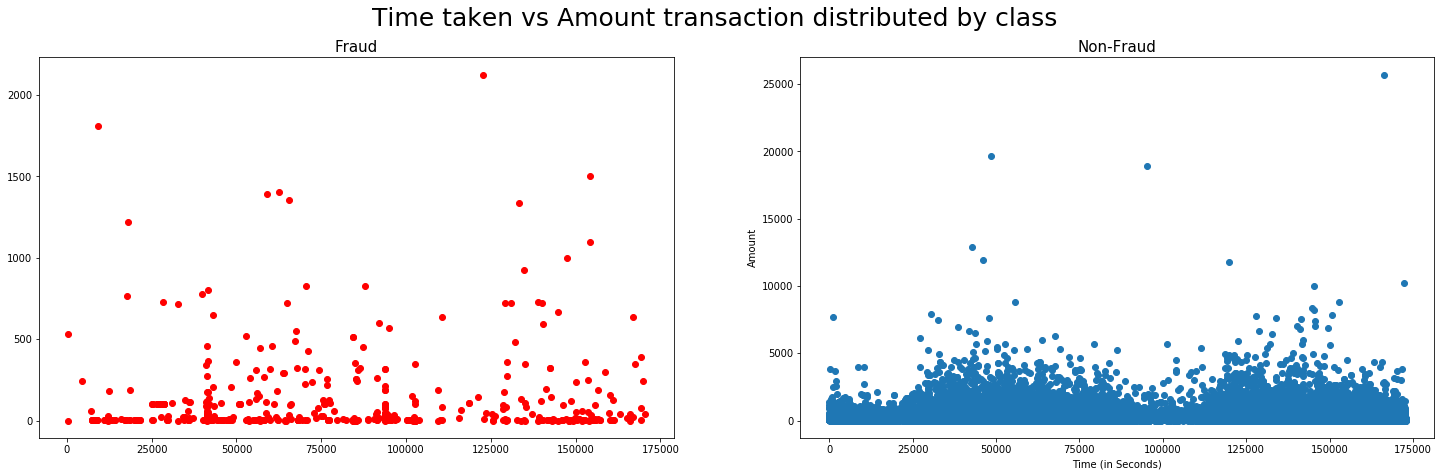

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(25, 7))
fig.suptitle('Time taken vs Amount transaction distributed by class', fontsize=25)

ax[0].scatter(fraud_data.Time, fraud_data.Amount, color='red')
ax[0].set_title('Fraud', fontsize = 15)

ax[1].scatter(non_fraud_data.Time, non_fraud_data.Amount)
ax[1].set_title('Non-Fraud' , fontsize = 15)

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [15]:
data['Normalized_Amount'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
fields_to_drop = ['Amount','Time']
data = data.drop(fields_to_drop,axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


In [16]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


# Train - Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=13)

X_train,X_test = X_train.values, X_test.values
y_train,y_test = y_train.values, y_test.values

print(f' X Train : {X_train.shape}')
print(f' X Test  : {X_test.shape}')
print(f' y Train : {y_train.shape}')
print(f' y Test  : {y_test.shape}')

 X Train : (199364, 29)
 X Test  : (85443, 29)
 y Train : (199364, 1)
 y Test  : (85443, 1)


# Fraud Detection Modeling

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Logistic Regression

Default Parameters Logistic Regression:

Logistic Regression Parameters:
 LogisticRegression()
 Default Score: 0.9992743700478681

Hyper-Tuning Logistic Regression:

 Tuned Parameters:
 LogisticRegression(C=1)
 Tuned Params: {'C': 1, 'penalty': 'l2'}

 Hyper-Tuned Score: 0.9992743700478681

Confusion matrix, without normalization
[[85298     9]
 [   53    83]]


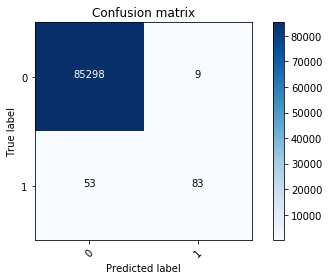

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)
print('Default Parameters Logistic Regression:\n')
print(f'Logistic Regression Parameters:\n {log_reg}')
print(f' Default Score: {log_reg.score(X_test,y_test)}\n')

print('Hyper-Tuning Logistic Regression:\n')

log_reg_params = {"penalty": ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params)
log_reg_grid.fit(X_train, y_train)
log_reg = log_reg_grid.best_estimator_
print(f' Tuned Parameters:\n {log_reg_grid.best_estimator_}')
print(f' Tuned Params: {log_reg_grid.best_params_}\n')
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

log_reg_score = log_reg.score(X_test, y_test)
print(f' Hyper-Tuned Score: {log_reg_score}\n')

log_reg_cnf_matrix = confusion_matrix(y_test, log_reg_preds)
plot_confusion_matrix(log_reg_cnf_matrix, classes=[0, 1])
plt.show()

## Decision-Tree Classifier

Default Parameters Decision Tree:

Decision Tree Parameters:
 DecisionTreeClassifier()
 Default Score: 0.9992275552122467

Hyper-Tuning Decision Tree:

 Tuned Parameters:
 DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6)
 Tuned Params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}

 Hyper-Tuned Score: 0.9994499256814484

Confusion matrix, without normalization
[[85293    14]
 [   33   103]]


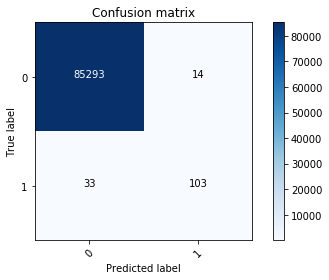

In [20]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_preds = decision_tree.predict(X_test)
print('Default Parameters Decision Tree:\n')
print(f'Decision Tree Parameters:\n {decision_tree}')
print(f' Default Score: {decision_tree.score(X_test,y_test)}\n')

print('Hyper-Tuning Decision Tree:\n')

decision_tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 10, 1)),
                        "min_samples_leaf": list(range(2, 10, 1))}

decision_tree_grid = GridSearchCV(
    DecisionTreeClassifier(), decision_tree_params)
decision_tree_grid.fit(X_train, y_train)
decision_tree = decision_tree_grid.best_estimator_
print(f' Tuned Parameters:\n {decision_tree_grid.best_estimator_}')
print(f' Tuned Params: {decision_tree_grid.best_params_}\n')
decision_tree.fit(X_train, y_train)
decision_tree_preds = decision_tree.predict(X_test)

decision_tree_score = decision_tree.score(X_test,y_test)
print(f' Hyper-Tuned Score: {decision_tree_score}\n')

decision_tree_cnf_matrix = confusion_matrix(y_test, decision_tree_preds)
plot_confusion_matrix(decision_tree_cnf_matrix, classes=[0, 1])
plt.show()

## Random Forest Classifier

Default Random Forest:

 Parameters:
 RandomForestClassifier()
 Default Score: 0.999602073897218

Hyper-Tuning Random Forest:

 Tuned Parameters:
 RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=250)
 Tuned Params: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 250}

 Hyper-Tuned Score: 0.9995786664794073

Confusion matrix, without normalization
[[85303     4]
 [   32   104]]


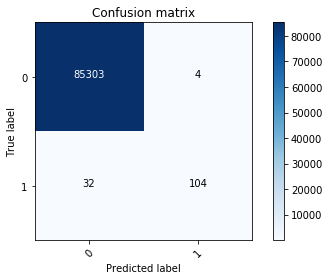

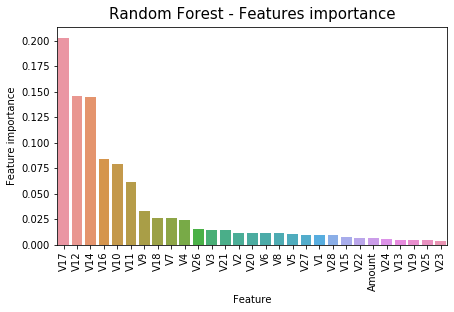

In [21]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)
print('Default Random Forest:\n')
print(f' Parameters:\n {random_forest}')
print(f' Default Score: {random_forest.score(X_test,y_test)}\n')

print('Hyper-Tuning Random Forest:\n')

random_forest_params = {"n_estimators": [200, 250, 300],
                        "bootstrap": [True, False],
                        "max_depth": [15, 20],
                        "min_samples_split": [2, 5],
                        "min_samples_leaf": [3,5]}

random_forest_grid = GridSearchCV(
    RandomForestClassifier(), random_forest_params)
random_forest_grid.fit(X_train, y_train)
random_forest = random_forest_grid.best_estimator_
print(f' Tuned Parameters:\n {random_forest_grid.best_estimator_}')
print(f' Tuned Params: {random_forest_grid.best_params_}\n')
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(X_test)

random_forest_score = random_forest.score(X_test, y_test)
print(f' Hyper-Tuned Score: {random_forest_score}\n')

random_forest_cnf_matrix = confusion_matrix(y_test, random_forest_preds)
plot_confusion_matrix(random_forest_cnf_matrix, classes=[0, 1])
plt.show()

rf_feature_imp = pd.DataFrame({'Feature': predictors, 'Feature importance': random_forest.feature_importances_})
rf_feature_imp = rf_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
s = sns.barplot(x='Feature',y='Feature importance',data= rf_feature_imp)
plt.title('Random Forest - Features importance',fontsize=15, y=1.01)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

## XGBoost

[16:10:47] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.90280
Will train until train-auc hasn't improved in 50 rounds.
[100]	train-auc:0.93186
[200]	train-auc:0.97693
[300]	train-auc:0.99817
[400]	train-auc:0.99988
[500]	train-auc:0.99999


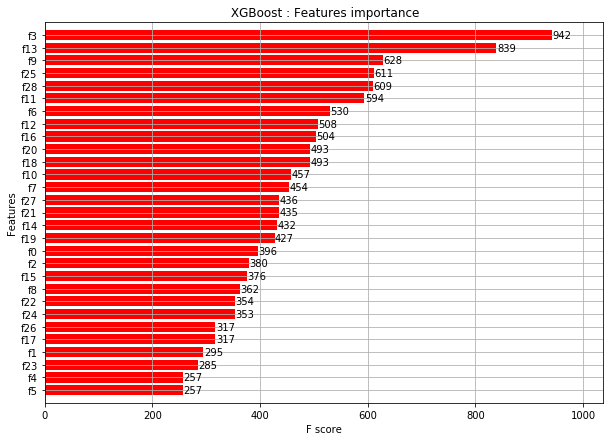

In [23]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train')]

xgb_params = {'booster': 'gbtree',
              'tree_method': 'gpu_hist',
              'objective': 'binary:logistic',
              'eta': 0.020,
              'silent': True,
              'max_depth': 15,
              'subsample': 0.8,
              'colsample_bytree': 0.9,
              'colsample_bylevel': 0.5,
              'eval_metric': 'auc',
              'random_state': 13
              }

xgb_model = xgb.train(xgb_params, dtrain, 501, watchlist, early_stopping_rounds=50,
                      maximize=True, verbose_eval=100)
xgb_preds = xgb_model.predict(dtest)

fig, ax = plt.subplots(figsize=(10, 7))
xgb.plot_importance(xgb_model, height=0.8, title=" XGBoost : Features importance", ax=ax,
                    color="red")
plt.show()

# Deep Neural Network - ANN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 240       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

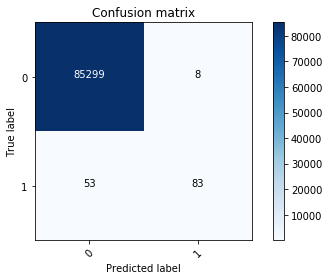

In [25]:
ANN_model = Sequential([
    Dense(units=8, input_dim = 29,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

ANN_model.summary()
print('')
print('Training Model:\n')
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN_model.fit(X_train,y_train,batch_size=16,epochs=100)
ANN_pred = ANN_model.predict(X_test)

print('')
print('Testing Model: \n')
ANN_acc_score = ANN_model.evaluate(X_test, y_test)
print('')
print(f'ANN Model Test Score: {ANN_acc_score}\n')
      
ANN_cnf_matrix = confusion_matrix(y_test,ANN_pred.round())
plot_confusion_matrix(ANN_cnf_matrix, classes=[0,1])
plt.show()

## Under Sampling

 Number of Fraud Transactions: 492
 Number of Non-Fraud Transactions: 492

 Number of Under-Sampled Data Generated : 984
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 240       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                504       

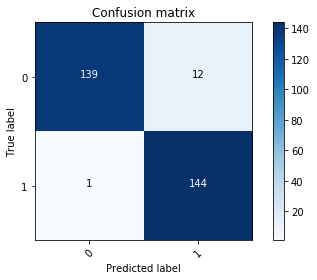

In [26]:
fraud_indices = np.array(data[data.Class == 1].index)
nonfraud_indices = data[data.Class == 0].index
number_records_fraud = len(fraud_indices)
print(f' Number of Fraud Transactions: {number_records_fraud}')

random_nonfraud_indices = np.random.choice(nonfraud_indices, number_records_fraud, replace=False)
random_nonfraud_indices = np.array(random_nonfraud_indices)
number_records_nonfraud = len(random_nonfraud_indices)
print(f' Number of Non-Fraud Transactions: {number_records_nonfraud}')

under_sample_indices = np.concatenate([fraud_indices,random_nonfraud_indices])
number_records_under_sampled = len(under_sample_indices)
print('')
print(f' Number of Under-Sampled Data Generated : {number_records_under_sampled}')

under_sample_data = data.iloc[under_sample_indices,:]
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

X_train,X_test = X_train.values, X_test.values
y_train,y_test = y_train.values, y_test.values

ANN_model.summary()
print('')
print('Training Model:\n')
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN_model.fit(X_train,y_train,batch_size=16,epochs=100)
under_sample_ANN_pred = ANN_model.predict(X_test)

print('')
print('Testing Model: \n')
under_sample_ANN_acc_score = ANN_model.evaluate(X_test, y_test)
print('')
print(f'ANN Model Test Score: {under_sample_ANN_acc_score}\n')
      
under_sample_ANN_cnf_matrix = confusion_matrix(y_test,under_sample_ANN_pred.round())
plot_confusion_matrix(under_sample_ANN_cnf_matrix, classes=[0,1])
plt.show()

## SMOTE Sampling

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 240       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

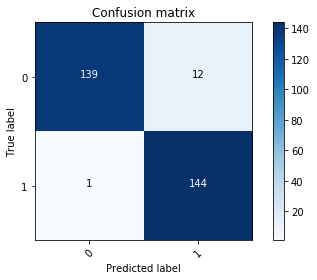

In [27]:
X_resample, y_resample = SMOTE().fit_sample(X,y)
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

X_train,X_test = X_train.values, X_test.values
y_train,y_test = y_train.values, y_test.values

ANN_model.summary()
print('')
print('Training Model:\n')
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ANN_model.fit(X_train,y_train,batch_size=16,epochs=100)
smote_ANN_pred = ANN_model.predict(X_test)

print('')
print('Testing Model: \n')
smote_ANN_acc_score = ANN_model.evaluate(X_test, y_test)
print('')
print(f'SMOTE ANN Model Test Score: {smote_ANN_acc_score}\n')
      
smote_ANN_cnf_matrix = confusion_matrix(y_test,smote_ANN_pred.round())
plot_confusion_matrix(under_sample_ANN_cnf_matrix, classes=[0,1])
plt.show()